#**DESAFÍO - ALGORITMOS DE CLASIFICACION- FEATURE SELECTION**
> Nombre del Dataset: Dataset-Telco-Customer-Churn.csv



#PREPARACION DE LOS DATOS

##Instalación y carga de librerías a utilizar

In [476]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#building model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data display coustomization
pd.set_option('display.max_columns', 100)


##Carga del dataset en formato .csv






In [477]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ProyectoDataScience/'
df_churn = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')
df_Original = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1JBjZRPlZTm-Ax9WZx4quXsWlJqPbkKqm/ProyectoDataScience


##Mostar el Dataset Preliminar (Sin transformaciones)



In [478]:
print('---------- HEAD ---------- ')
display(df_churn.head())
print('---------- DESCRIBE ---------- ')
display(df_churn.describe(include="all").T)
print('---------- SHAPE ---------- ')
display(df_churn.shape)
print('---------- INFO ---------- ')
display(df_churn.info())

---------- HEAD ---------- 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---------- DESCRIBE ---------- 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------- SHAPE ---------- 


(7043, 21)

---------- INFO ---------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

None

Este dataset incluye un total de 7,043 registros.


##Contar valores NA por columna

In [479]:
print(df_churn.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##Eliminación de la columna del Id de cliente que no es relevante a estudio

In [480]:
df_churn.drop("customerID", axis=1, inplace=True)

##Casteo de los datos
> Cambio de los tipos de datos y valores a booleanos para poder analizarlos

In [481]:
df_churn.gender = [1 if x == "Male" else 0 for x in df_churn.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df_churn[col] = [1 if x == "Yes" else 0 for x in df_churn[col]]
df_churn.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


##Busqueda y Eliminación de duplicados

In [482]:
print(df_churn.shape)
df_churn = df_churn.drop_duplicates()
print(df_churn.shape)
#display(df_churn.head())

(7043, 20)
(7021, 20)


##Detección de outliers

In [483]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'],errors = 'coerce') # Convertir TotalCharges a float

In [484]:
# Create a new DataFrame with only numeric columns
numeric_data = df_churn.select_dtypes(include=np.number)
display(numeric_data.info())
display(numeric_data.head())
numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'],errors = 'coerce') # Convertir TotalCharges a float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   OnlineSecurity    7021 non-null   int64  
 8   OnlineBackup      7021 non-null   int64  
 9   DeviceProtection  7021 non-null   int64  
 10  TechSupport       7021 non-null   int64  
 11  StreamingTV       7021 non-null   int64  
 12  StreamingMovies   7021 non-null   int64  
 13  PaperlessBilling  7021 non-null   int64  
 14  MonthlyCharges    7021 non-null   float64
 15  TotalCharges      7010 non-null   float64
 16  Churn             7021 non-null   int64  


None

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1


#EDA

##Tasa de abandono de clientes

------------------ GENDER ------------------
1    3541
0    3480
Name: gender, dtype: int64


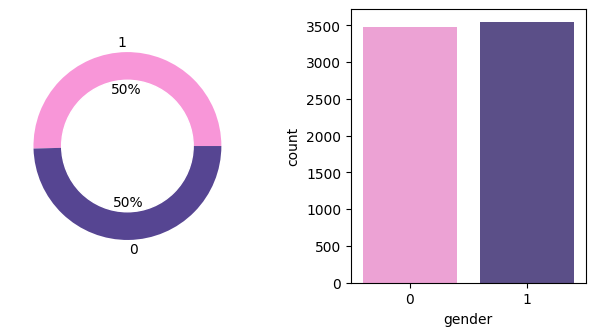

In [485]:
 Col_Analizar = "gender"
 colors = ["#f896d8", "#564592", "#A5E6BA", "#724cf9", "#ca7df9"]
 print(f'\033[1m' + f'------------------ {Col_Analizar.upper()} ------------------' + '\033[0m')
 print(df_churn[Col_Analizar].value_counts())
 plt.figure(figsize=(10, 4))
 plt.subplot(1, 3, 1)
 plt.pie(df_churn[Col_Analizar].value_counts().values.tolist(),
            labels=df_churn[Col_Analizar].value_counts().keys().tolist(),
            colors=colors,
            autopct='%1.0f%%')
 circle = plt.Circle((0, 0), 0.7, color='white')
 p = plt.gcf()
 p.gca().add_artist(circle)

 plt.subplot(1, 3, 2)
 sns.countplot(data=df_churn, x=Col_Analizar, palette=colors)
 plt.tight_layout(pad=3)

 plt.show()

Se seleccionó un grafico de tarta, ya que solo hay 2 clases y se representa más claramente la magnitud de cada uno.
>Se evidenció que casi 1/4 de los clientes ha abandonado de contrato.

##Distribución de la permanencia en el contrato



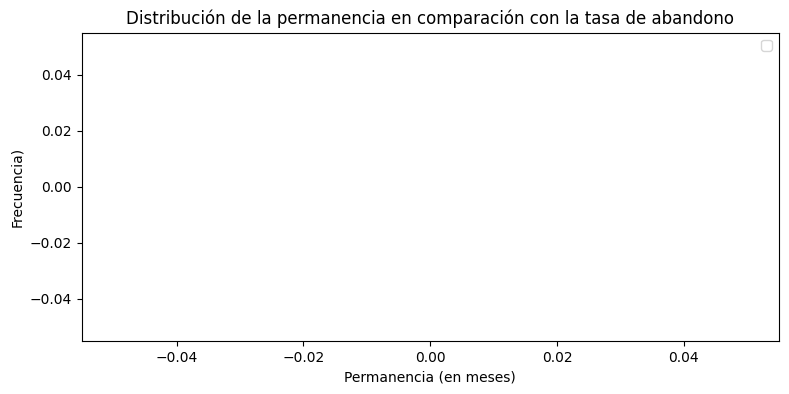

In [486]:
plt.figure(figsize = (9,4))
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "Yes") ], shade = True)
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "No") ], shade= True)
g.set_xlabel("Permanencia (en meses)")
g.set_ylabel("Frecuencia)")
plt.title('Distribución de la permanencia en comparación con la tasa de abandono')
g = g.legend(["Abandona","Permanece"])

> Según la informacion la mayoría de los clientes que abandonaron estuvieron  en la empresa menos de 20 meses, a medida que aumenta la permanencia la probabilidad de abandonar disminuye.

##Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono

Churn
0    61.344878
1    74.604308
Name: MonthlyCharges, dtype: float64 

Churn
1    1541.376548
0    2560.264118
Name: TotalCharges, dtype: float64 



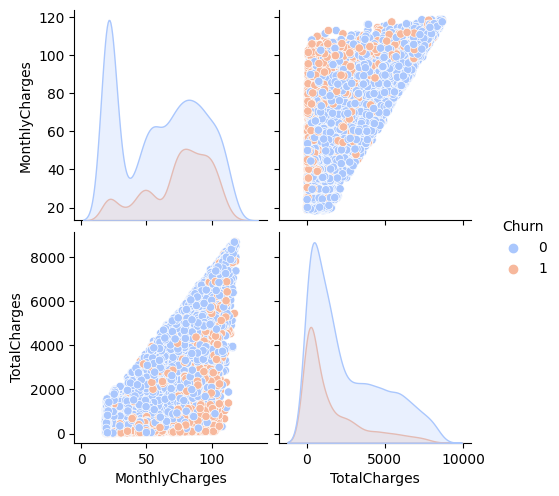

In [487]:
print(df_churn.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['Churn'])['TotalCharges'].mean().sort_values(), '\n')

datos_1 = ['MonthlyCharges','TotalCharges', 'Churn']
sns.pairplot(df_churn[datos_1], hue = 'Churn', palette='coolwarm')

count    7021.000000
mean       32.469449
std        24.534965
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Skew:  0.23549135483276984
Kurtosis:  1.6120439849837025
IQR:  46.0


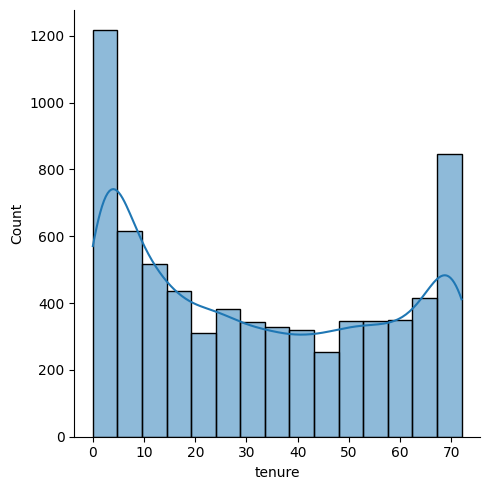

In [488]:
Col_Analizar = 'tenure'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)

0    1.282728
1    0.062387
2    1.241967
3    0.510759
4    1.241967
5    0.997401
6    0.426746
7    0.915879
Name: tenure, dtype: float64

count    7021.000000
mean        0.890634
std         0.454753
min         0.019135
25%         0.510759
50%         0.956640
75%         1.282728
max         1.611307
Name: tenure, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    7021.000000
mean       32.469449
std        24.534965
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: >

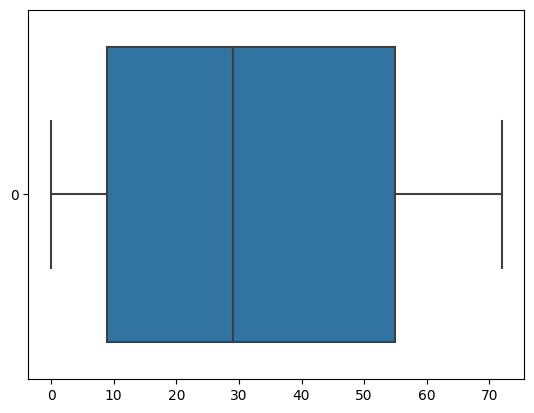

In [489]:
#Cálculo de ZScore
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [490]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR

DescribeResult(nobs=7021, minmax=(0, 72), mean=32.46944879646774, variance=601.9644867189234, skewness=0.23549135483276984, kurtosis=-1.3879560150162975)
Media geometrica:  0.0
Media armonica:  0.0
Media recortada:  31.546021007655334
Moda:  ModeResult(mode=array([1]), count=array([591]))
Coeficiente de variacion:  0.7555784950745276
IQR:  46.0


count    7021.000000
mean       64.851894
std        30.069001
min        18.250000
25%        35.750000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64
Skew:  -0.22404940903931683
Kurtosis:  1.7460647910547091
IQR:  54.150000000000006


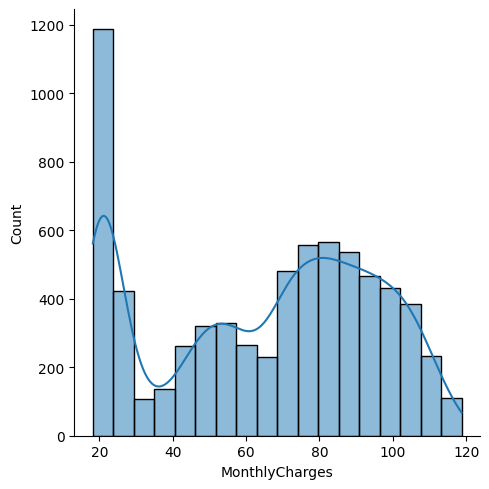

In [491]:
Col_Analizar = 'MonthlyCharges'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)

0    1.164135
1    0.262811
2    0.365914
3    0.750058
4    0.194503
5    1.157358
6    0.806473
7    1.167461
Name: MonthlyCharges, dtype: float64

count    7021.000000
mean        0.871232
std         0.490906
min         0.000063
25%         0.460703
50%         0.844847
75%         1.343735
max         1.792608
Name: MonthlyCharges, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    7021.000000
mean       64.851894
std        30.069001
min        18.250000
25%        35.750000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: >

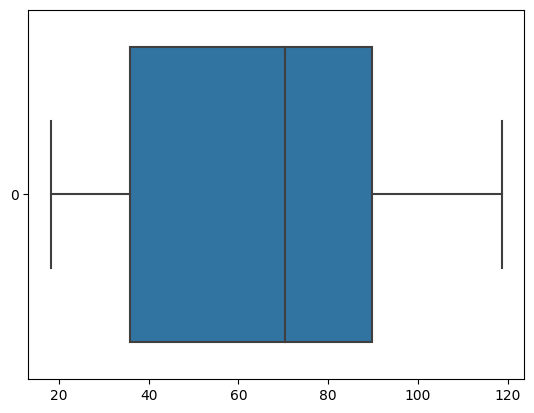

In [492]:
#Cálculo de ZScore
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [493]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR

DescribeResult(nobs=7021, minmax=(18.25, 118.75), mean=64.85189431704886, variance=904.1448183483735, skewness=-0.22404940903931683, kurtosis=-1.2539352089452909)
Media geometrica:  55.91409992423914
Media armonica:  46.04519638557519
Media recortada:  65.07643760014243
Moda:  ModeResult(mode=array([20.05]), count=array([59]))
Coeficiente de variacion:  0.463623458224218
IQR:  54.150000000000006


count    7010.000000
mean     2290.353388
std      2266.820832
min        18.800000
25%       408.312500
50%      1403.875000
75%      3807.837500
max      8684.800000
Name: TotalCharges, dtype: float64
Skew:  0.9581169846913229
Kurtosis:  2.7609409418723323
IQR:  3399.525


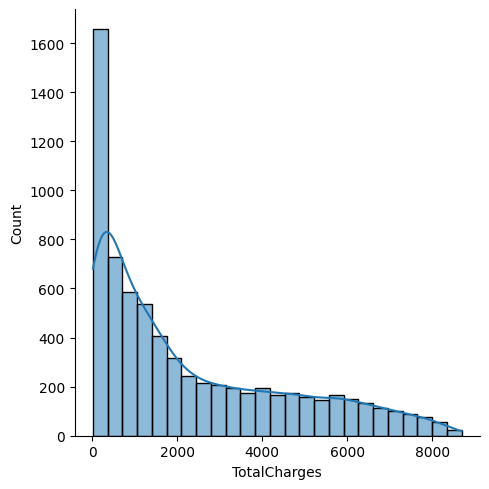

In [494]:
Col_Analizar = 'TotalCharges'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
column = numeric_data[Col_Analizar].dropna()
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)

0    0.997284
1    0.176848
2    0.962740
3    0.198355
4    0.943549
5    0.648467
6    0.150421
7    0.877262
Name: TotalCharges, dtype: float64

count    7010.000000
mean        0.838265
std         0.545301
min         0.000200
25%         0.462334
50%         0.802039
75%         0.987860
max         2.821089
Name: TotalCharges, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    6620.000000
mean     1980.995884
std      1925.347198
min        18.800000
25%       365.387500
50%      1275.675000
75%      3249.662500
max      6823.400000
Name: TotalCharges, dtype: float64

<Axes: >

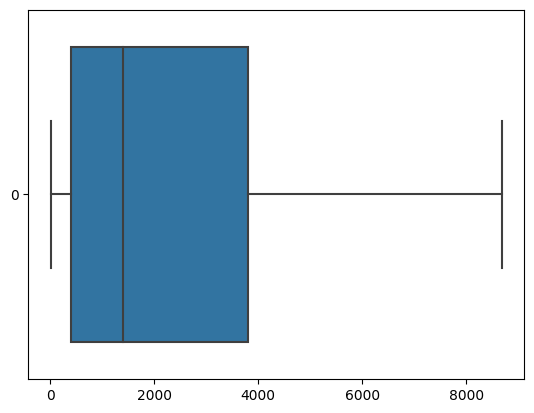

In [495]:
#Cálculo de ZScore
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [496]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)


DescribeResult(nobs=7010, minmax=(18.8, 8684.8), mean=2290.3533880171185, variance=5138476.683244691, skewness=0.9581169846913229, kurtosis=-0.2390590581276677)
Media geometrica:  1043.7118097750326
Media armonica:  259.8055894642402
Media recortada:  1978.2929654065622
Moda:  ModeResult(mode=array([19.75]), count=array([9]))
Coeficiente de variacion:  0.9896547637776886
IQR:  3399.525


###Resumen del comportamiento de las variables numericas

En general se observó que todas las variables numéricas del dataset  no tienen una distribución normal, por los que procederemos a calcular las desviaciones estandar, y la asimetría de los mismos.

* "tenure" :
  * La variable tenure indica el número de meses que un cliente ha estado suscrito al servicio. El valor mínimo es 0 (lo que indica que el cliente acaba de suscribirse) y el valor máximo es 72. La media es de 32,37 meses y la mediana es de 29 meses.
  * La mayoría de los clientes abandonan después de un tiempo relativamente corto.Existe un problema con la retención de clientes a largo plazo en la empresa.
  * Hay una gran variación en la duración de la membresía de los clientes que abandonan lo  podría indicar que hay diferentes factores que contribuyen al abandono, y que es necesario analizarlo con respecto a otras variables.
  *  En general tiene una distribución aproximadamente simétrica, con un sesgo cercano a cero y una curtosis cercana a la normalidad. Esto indica que la mayoría de los clientes tienen una duración de contrato similar, con algunas diferencias en los extremos. <br>
  * RESUMEN NUMÉRICO<br>
mean       64.761692<br>
std        30.090047<br>
min        18.250000<br>
25%        35.500000<br>
50%        70.350000<br>
75%        89.850000<br>
max       118.750000<br>
variance=603.1681081237369 <br>
skewness=0.2394887299846216<br>kurtosis=-1.3872386910324277<br>
Coeficiente de variacion:  0.7586303990053388<br>
IQR:  46.0<br><br>

* "MonthlyCharges" : <br>
  * Los cargos mensuales indican que la mayoría de los clientes que abandonan tienen cargos mensuales bajos, y que los cargos más altos tienen una menor tasa, disminuyendo el abandono a partir del 3er quartil.
  * El sesgo y la curtosis de esta variable se se comporta de manera similar a la variable Tenure, lo que indica que la mayoría de los clientes tienen cargos mensuales similares, pero algunos clientes tienen cargos mensuales significativamente mas cerca de los extremos.
  * En general, se observa una tendencia de que los clientes que pagan menos  por el servicio tienen más probabilidades de cancelar. se observó que el 24.4% de los clientes que pagan más de 70 por mes cancelaron segun el boxplot.

 * RESUMEN NUMÉRICO<br>
mean       64.761692<br>
std        30.090047<br>
min        18.250000<br>
25%        35.500000<br>
50%        70.350000<br>
75%        89.850000<br>
max       118.750000<br>
variance=905.4109343405098<br>
Skewness=-0.2204774644391769<br>
kurtosis=-1.2572191009381857)<br>
Coeficiente de variacion:  0.4645942641669282<br>
IQR:  54.35<br><br>

* "TotalCharges" : <br>
  * Segun la distribución de los cargos totales de los clientes que abandonan,se puede determinar que la mayoría de ellos tienen cargos totales relativamente bajos y que a medida que estos aumentan disminuye la tasa de abandono. observandose un sesgo totalmente a la derecha.

  * La media de la variable TotalCharges es de aproximadamente $2283.30, mientras que la mediana es de 1397.47. La diferencia entre la media y la mediana sugiere que hay valores atípicos en el extremo superior de la distribución.

 * RESUMEN NUMÉRICO<br>
mean     2283.300441<br>
std      2266.771362<br>
min        18.800000<br>
25%       401.450000<br>
50%      1397.475000<br>
75%      3794.737500<br>
max      8684.800000<br>
variance=5138252.407053568<br>
Skewness=0.9614373590490068<br>
kurtosis=-0.23248709758655117)<br>
Coeficiente de variacion:  0.9926902917247381<br>
IQR:  3393.2875000000004<br><br>


En conclusión Las variables numéricas tenure, MonthlyCharges y TotalCharges tienen distribuciones similares a las que se describieron anteriormente. La mayoría de los clientes tienen una duración de contrato similar, cargos mensuales similares y cargos totales similares, pero con algunas diferencias en los extremos lo que sugiere que los clientes que han estado mas antiguos en la compañía y que pagan más mensualmente tienen cargos totales más altos.

##Análisis univariado variables categoricas

------------------ GENDER ------------------
1    3541
0    3480
Name: gender, dtype: int64


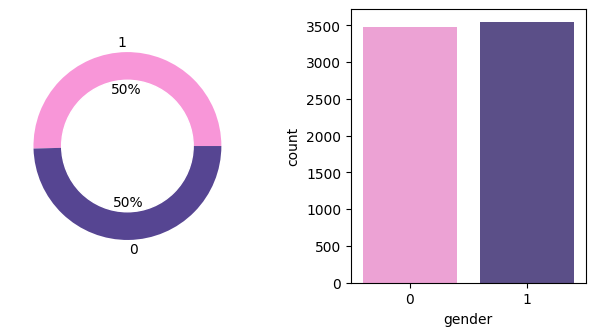

------------------ PARTNER ------------------
0    3619
1    3402
Name: Partner, dtype: int64


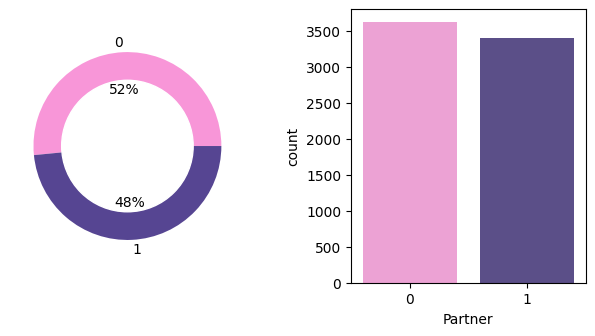

------------------ DEPENDENTS ------------------
0    4911
1    2110
Name: Dependents, dtype: int64


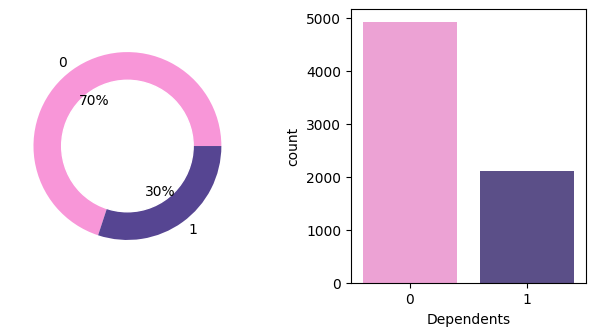

------------------ PHONESERVICE ------------------
1    6339
0     682
Name: PhoneService, dtype: int64


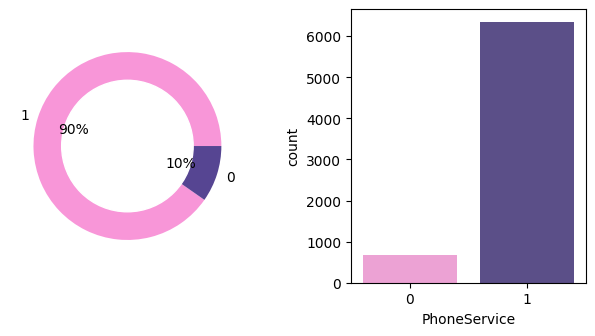

------------------ MULTIPLELINES ------------------
0    4050
1    2971
Name: MultipleLines, dtype: int64


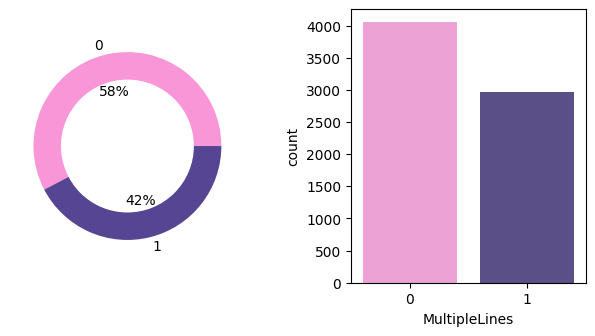

------------------ INTERNETSERVICE ------------------
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


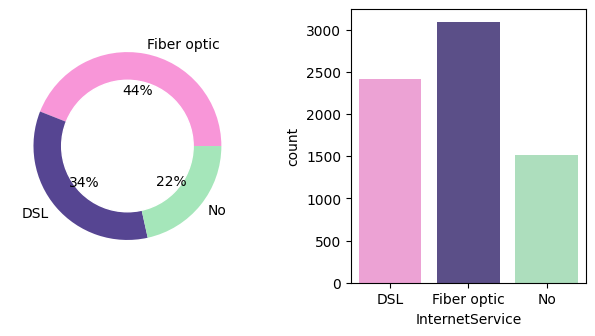

------------------ ONLINESECURITY ------------------
0    5002
1    2019
Name: OnlineSecurity, dtype: int64


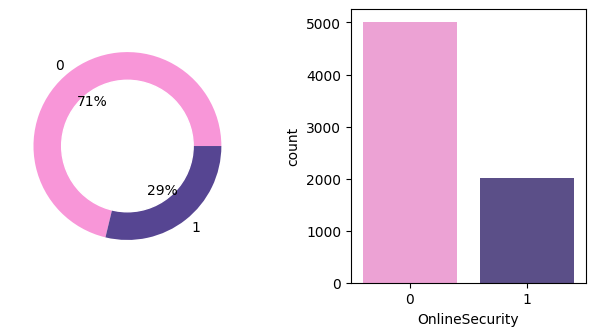

------------------ ONLINEBACKUP ------------------
0    4592
1    2429
Name: OnlineBackup, dtype: int64


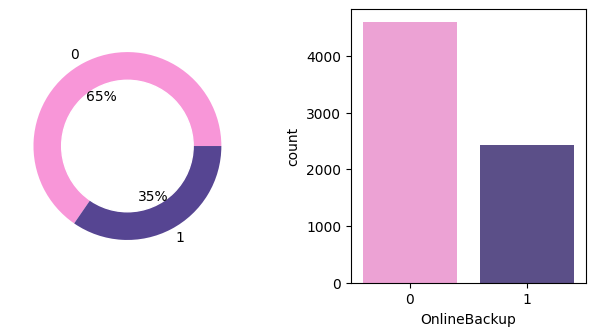

------------------ DEVICEPROTECTION ------------------
0    4599
1    2422
Name: DeviceProtection, dtype: int64


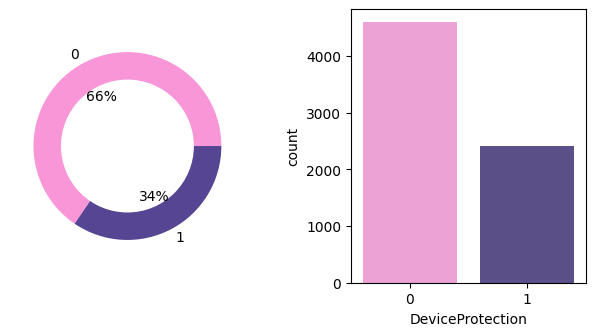

------------------ TECHSUPPORT ------------------
0    4977
1    2044
Name: TechSupport, dtype: int64


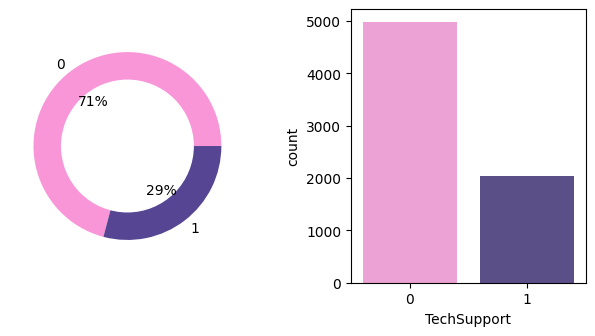

------------------ PAYMENTMETHOD ------------------
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


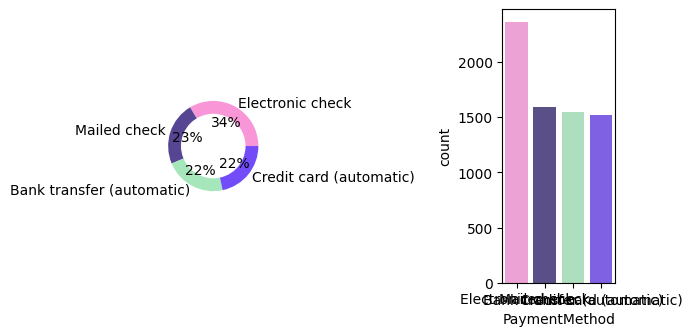

------------------ PAPERLESSBILLING ------------------
1    4161
0    2860
Name: PaperlessBilling, dtype: int64


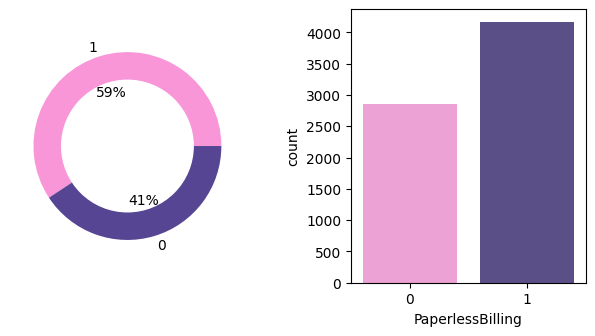

------------------ CONTRACT ------------------
Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


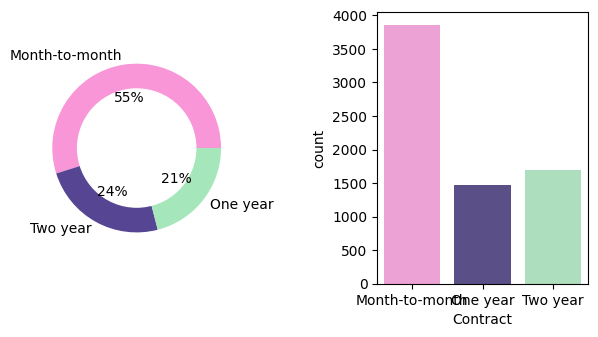

------------------ STREAMINGMOVIES ------------------
0    4289
1    2732
Name: StreamingMovies, dtype: int64


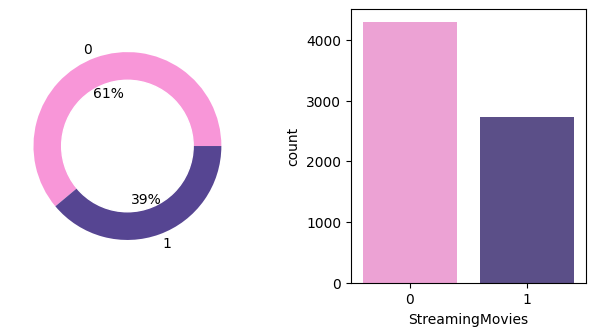

------------------ STREAMINGTV ------------------
0    4314
1    2707
Name: StreamingTV, dtype: int64


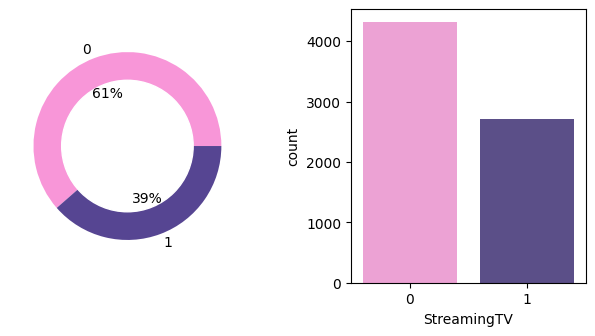

In [497]:
col_categoricas = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "PaymentMethod", "PaperlessBilling", "Contract", "StreamingMovies", "StreamingTV"]
for i, columna in enumerate(col_categoricas):
 Col_Analizar = columna
 colors = ["#f896d8", "#564592", "#A5E6BA", "#724cf9", "#ca7df9"]
 print(f'\033[1m' + f'------------------ {Col_Analizar.upper()} ------------------' + '\033[0m')
 print(df_churn[Col_Analizar].value_counts())
 plt.figure(figsize=(10, 4))
 plt.subplot(1, 3, 1)
 plt.pie(df_churn[Col_Analizar].value_counts().values.tolist(),
            labels=df_churn[Col_Analizar].value_counts().keys().tolist(),
            colors=colors,
            autopct='%1.0f%%')
 circle = plt.Circle((0, 0), 0.7, color='white')
 p = plt.gcf()
 p.gca().add_artist(circle)

 plt.subplot(1, 3, 2)
 sns.countplot(data=df_churn, x=Col_Analizar, palette=colors)
 plt.tight_layout(pad=3)

 plt.show()


In [498]:
telecom = df_Original #reseteo del dataframe


###Resumen del comportamiento de las variables categoricas

* "gender" : Al analizar  la columna genero observamos que estan distribuidas uniformemente.

* "Partner" : con respecto a esta columna observamos que ligeramente es mayor la opcion "No".

* "Dependents" : Para los clientes que tienen dependientes observamos que el 70% no ha abandonado o cancelado contrato.

* "PhoneService" : En su mayoria los clientes que contratan tambien contratan servicio telefonico.

* "MultipleLines" : de los abonados totales la mayoría no tiene multiples lineas.

* "InternetService" : En su mayoria el servicio de internet es por fibra óptica.

* "OnlineSecurity" : La mitad de los clientes no contratan este serivicio.

* "OnlineBackup" : El 44% de los clientes no contrata este servicio.

* "DeviceProtection" : Igual al anterior.

* "TechSupport" : Alrededor de un 30% contrata este servicio.

* "PaymentMethod" : 34% de los clientes prefiere pago electronico

* "PaperlessBilling" : La mayoria prefiere cobro sin papel.

* "Contract" : El contrato mes a mes es el predominante.

* "StreamingMovies" y "StreamingTV" : Al rededor de 6 de cada 10 clientes no contratan servicios de streaming.


#PREPROCESAMIENTO

##Conversion de Variables

In [499]:
#Conversión de variables binarias (Sí/No) en (1/ 0)
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

bin_var =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

telecom[bin_var] = telecom[bin_var].apply(binary_map)

#Conversión de variable binaria género (masculino/femenino) en (1/ 0)
#Crear dummies para el género y eliminar la primera columna porque una sola columna puede capturar todos los datos
gender = pd.get_dummies(telecom['gender'], drop_first=True)

# Fusionando los resultados anteriores con el dataframe
telecom = pd.concat([telecom, gender], axis=1)


#Conversión de variables multinomiales mediante la creación de variables dummies
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'InternetService']], drop_first=True)

# Agregar los resultados al dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

#Creando variables dummies para las variables categóricas restantes

ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
telecom = pd.concat([telecom,ml1], axis=1)


os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
telecom = pd.concat([telecom,os1], axis=1)


ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
telecom = pd.concat([telecom,ob1], axis=1)

dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
telecom = pd.concat([telecom,dp1], axis=1)

ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
telecom = pd.concat([telecom,ts1], axis=1)

st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
telecom = pd.concat([telecom,st1], axis=1)

ssm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
ssm1 = ssm.drop(['StreamingMovies_No internet service'], 1)
telecom = pd.concat([telecom,ssm1], axis=1)


telecom.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


##Eliminar variables repetidas (convertidas)

In [500]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

#La variable TotalCharges es del tipo de datos String, por lo que se convierte en tipo flotante
telecom['TotalCharges'] = pd.to_numeric(telecom["TotalCharges"].replace(" ",""),downcast="float")

#Comprobando los tipos de datos de las variables
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float32
 9   Churn                                  7043 non-null   int64  
 10  Male                                   7043 non-null   uint8  
 11  Cont

#ALGORITMOS DE CLASIFICACIÓN
Escoger 3 algoritmos de clasificacion

Calcular las metricas de evaluación
>   Accuracy

>   Pred or etiqueta

>   Recall por etiqueta

Interprestar los resultados

In [501]:
#Eliminar la columna customerID, y la columna target 'Churn'
X = telecom.drop(['Churn','customerID','TotalCharges'], axis=1)
#Dividir los datos en conjuntos de entrenamiento y prueba
display(X.head())
y = telecom['Churn']
display(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [502]:
# Apply Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Apply K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Print classification report for Logistic Regression
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Print classification report for K-Nearest Neighbors
print("Classification report for K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Classification report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1036
           1       0.56      0.51      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [503]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Apply Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Apply Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Print classification report for Decision Tree
print("Classification report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Print classification report for Support Vector Machines
print("Classification report for Support Vector Machines:\n", classification_report(y_test, y_pred_svc))

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1036
           1       0.48      0.46      0.47       373

    accuracy                           0.73      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.73      0.72      1409

Classification report for Support Vector Machines:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.71      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [504]:
# Importing necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on the test set
y_pred_lda = lda.predict(X_test)

# Apply Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Print classification report for Linear Discriminant Analysis
print("Classification report for Linear Discriminant Analysis:\n", classification_report(y_test, y_pred_lda))

# Print classification report for Naive Bayes
print("Classification report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Classification report for Linear Discriminant Analysis:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.50      0.80      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



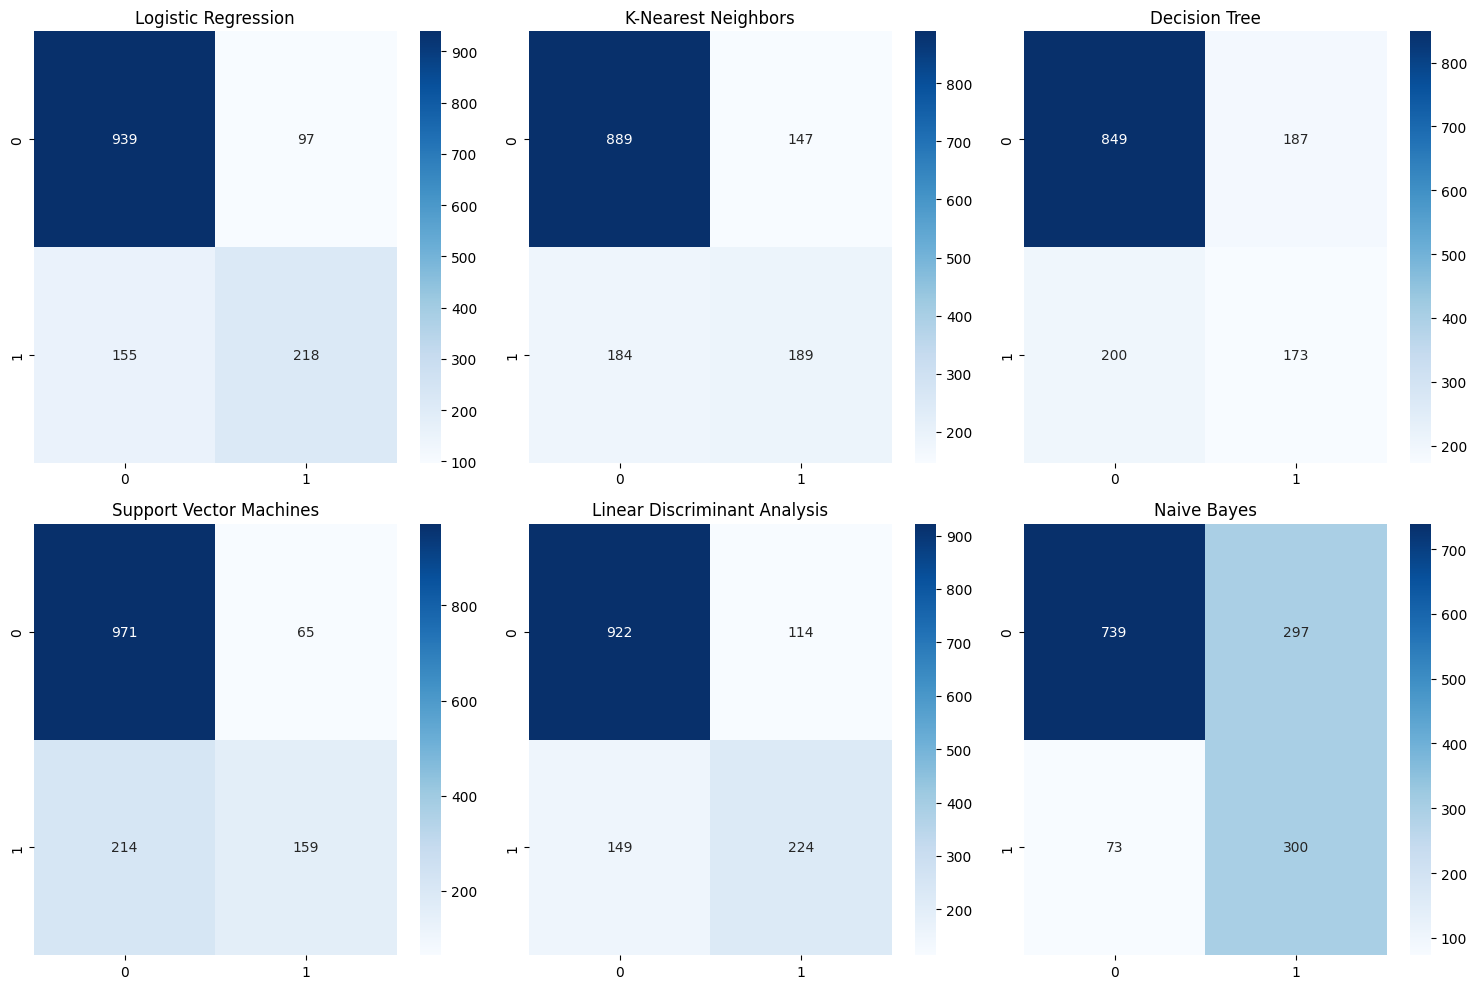

In [505]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for each model
models = {'Logistic Regression': y_pred_lr,
          'K-Nearest Neighbors': y_pred_knn,
          'Decision Tree': y_pred_dt,
          'Support Vector Machines': y_pred_svc,
          'Linear Discriminant Analysis': y_pred_lda,
          'Naive Bayes': y_pred_nb}

plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    cf_matrix = confusion_matrix(y_test, model)
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(name)

plt.tight_layout()
plt.show()